In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
num_of_words = 20000
max_len = 100

In [4]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=num_of_words)

In [5]:
X_train.shape

(25000,)

In [6]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)

In [7]:
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [8]:
X_train.shape

(25000, 100)

In [9]:
X_test.shape

(25000, 100)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_trained = to_categorical(y_train)

In [12]:
y_tested = to_categorical(y_test)

In [13]:
X_train.shape

(25000, 100)

In [14]:
y_trained.shape

(25000, 2)

In [15]:
from tensorflow.keras.layers import Dense,Embedding,LSTM

In [16]:
from tensorflow.keras.callbacks import EarlyStopping



In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,verbose=1,mode='min')

In [18]:
model = tf.keras.models.Sequential()

model.add(Embedding(input_dim=num_of_words,output_dim=128,input_shape=(X_train.shape[1],)))
model.add(LSTM(128,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
model.fit(X_train,y_train,batch_size=64,epochs=5,
         validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/5
391/391 [==============================] - 62s 160ms/step - loss: 0.4388 - accuracy: 0.8007 - val_loss: 0.3314 - val_accuracy: 0.8569
Epoch 2/5
391/391 [==============================] - 61s 156ms/step - loss: 0.2847 - accuracy: 0.8851 - val_loss: 0.3372 - val_accuracy: 0.8542
Epoch 00002: early stopping


In [20]:
df = pd.DataFrame(model.history.history)

In [21]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.438817,0.80068,0.331381,0.85688
1,0.284715,0.88512,0.337236,0.85416


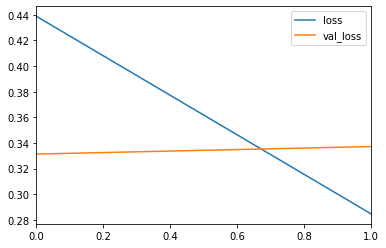

In [22]:
df[['loss','val_loss']].plot()

In [23]:
loss,accuracy = model.evaluate(X_test,y_test)

782/782 [==============================] - 18s 22ms/step - loss: 0.3372 - accuracy: 0.8542


In [24]:
print(accuracy)

0.8541600108146667


In [25]:
pred = model.predict_classes(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,pred))



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12500
           1       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [28]:
X_train[0].shape

(100,)

In [29]:
y_train[0]

1

In [30]:
y_trained[0]

array([0., 1.], dtype=float32)

In [47]:
sorted(model.predict_classes(X_test[99]))

[array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], dtype=int32),
 array([0], 

In [43]:
test_1 = X_test[0][99]

In [44]:
test_1

717